# Esercizio 11.1

La prima cosa che provo a far variare per migliorare il fit della rete neurale sono le epoche. Con un numero di epoche maggiori mi aspetto che la stima dei parametri del fit migliori sensibilmente.

In [144]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [152]:
np.random.seed(0)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function
param=[]
sigma = 0.5 # noise standard deviation, for the moment it is absent
y_valid = np.random.normal(m * x_valid + b, sigma)
x_train = np.random.uniform(-1, 1, 500)
y_train = np.random.normal(m * x_train + b, sigma)
    
model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
for i in range(30,50,2):
    history = model1.fit(x=x_train, y=y_train,
          batch_size=30, epochs=i,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
    param.append(model1.get_weights())

Epoch 1/30
17/17 [==============================] - 0s 8ms/step - loss: 1.0221 - mse: 1.0221 - val_loss: 0.7798 - val_mse: 0.7798
Epoch 2/30
17/17 [==============================] - 0s 3ms/step - loss: 0.6602 - mse: 0.6602 - val_loss: 0.5298 - val_mse: 0.5298
Epoch 3/30
17/17 [==============================] - 0s 3ms/step - loss: 0.4725 - mse: 0.4725 - val_loss: 0.4029 - val_mse: 0.4029
Epoch 4/30
17/17 [==============================] - 0s 3ms/step - loss: 0.3754 - mse: 0.3754 - val_loss: 0.3338 - val_mse: 0.3338
Epoch 5/30
17/17 [==============================] - 0s 2ms/step - loss: 0.3223 - mse: 0.3223 - val_loss: 0.2977 - val_mse: 0.2977
Epoch 6/30
17/17 [==============================] - 0s 2ms/step - loss: 0.2946 - mse: 0.2946 - val_loss: 0.2767 - val_mse: 0.2767
Epoch 7/30
17/17 [==============================] - 0s 2ms/step - loss: 0.2781 - mse: 0.2781 - val_loss: 0.2646 - val_mse: 0.2646
Epoch 8/30
17/17 [==============================] - 0s 2ms/step - loss: 0.2690 - mse: 0.26

Text(0.5, 1.0, 'Parametro q')

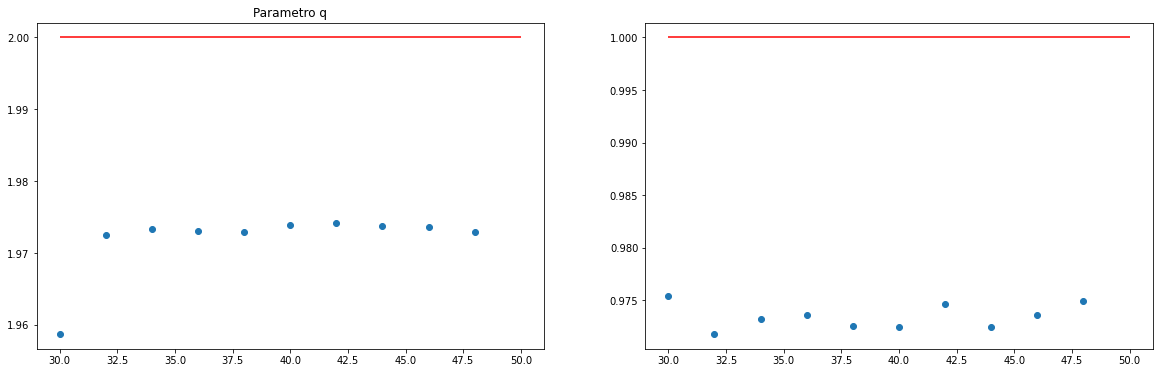

In [153]:
param=np.asarray(param)
param=param.astype('float')

fig,ax = plt.subplots(1,2, figsize=(20, 6))

ax[0].scatter(range(30,50,2),param[:,0])
ax[0].hlines(y=2,xmin=30,xmax=50,color='r')
ax[0].set_title('Parametro m')


ax[1].scatter(range(30,50,2),param[:,1])
ax[1].hlines(y=1,xmin=30,xmax=50,color='r')
ax[0].set_title('Parametro q')



Aumentando il numero di epoche in questo caso non migliora la valutazione dei nostri parametri. Ora provo ad aumentare i dati di training dati in pasto alla rete neurale

In [154]:

np.random.seed(0)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function
loss=[]
val_loss=[]
sigma = 0.5 # noise standard deviation, for the moment it is absent
y_valid = np.random.normal(m * x_valid + b, sigma)

model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
for i in range(500,1500,500):
    x_train = np.random.uniform(-1, 1, i)
    y_train = np.random.normal(m * x_train + b, sigma)
    history = model2.fit(x=x_train, y=y_train,
          batch_size=30, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
    loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])
        

Epoch 1/30
17/17 [==============================] - 0s 7ms/step - loss: 3.4644 - mse: 3.4644 - val_loss: 3.1650 - val_mse: 3.1650
Epoch 2/30
17/17 [==============================] - 0s 3ms/step - loss: 2.5962 - mse: 2.5962 - val_loss: 2.4126 - val_mse: 2.4126
Epoch 3/30
17/17 [==============================] - 0s 3ms/step - loss: 2.0084 - mse: 2.0084 - val_loss: 1.8885 - val_mse: 1.8885
Epoch 4/30
17/17 [==============================] - 0s 2ms/step - loss: 1.5873 - mse: 1.5873 - val_loss: 1.5141 - val_mse: 1.5141
Epoch 5/30
17/17 [==============================] - 0s 2ms/step - loss: 1.2808 - mse: 1.2808 - val_loss: 1.2408 - val_mse: 1.2408
Epoch 6/30
17/17 [==============================] - 0s 2ms/step - loss: 1.0522 - mse: 1.0522 - val_loss: 1.0351 - val_mse: 1.0351
Epoch 7/30
17/17 [==============================] - 0s 2ms/step - loss: 0.8795 - mse: 0.8795 - val_loss: 0.8748 - val_mse: 0.8748
Epoch 8/30
17/17 [==============================] - 0s 2ms/step - loss: 0.7438 - mse: 0.74

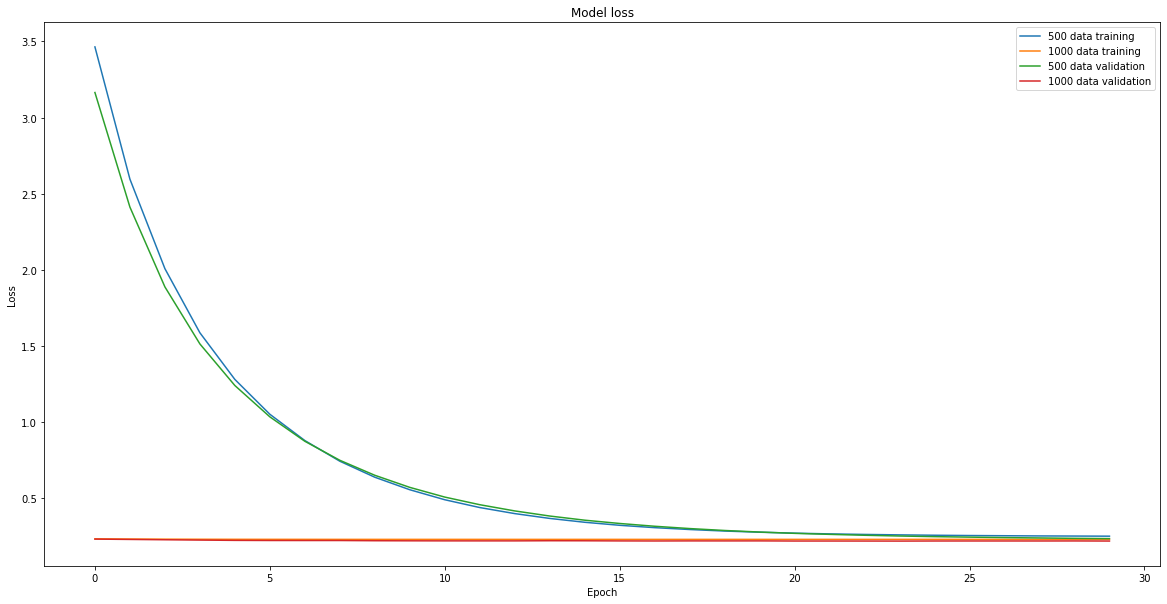

In [155]:
loss=np.asarray(loss)
val_loss=np.asarray(val_loss)
plt.figure(figsize=(20,10));
plt.plot(loss[0,:],label="500 data training")
plt.plot(loss[1,:],label="1000 data training")


plt.plot(val_loss[0,:],label="500 data validation")
plt.plot(val_loss[1,:],label="1000 data validation")



plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

Raddoppiando il numero di dati di training la loss per il training e la loss per la validation sono molto più piccole nelle epoche iniziali del training, successivamente invece sia con 500 che con 1000 dati di training i risultati della rete neurale sono identici.

Provo ora a dimezzare la sigma per vedere se con una varianza minore dei dati la rete neurale riesce ad ottenere risultati migliori

In [156]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function
loss=[]
val_loss=[]
sigma = 0.25 # noise standard deviation, for the moment it is absent
# actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
for i in range(1,3,1):
    sigma = 0.25*i
    y_train = np.random.normal(m * x_train + b, sigma) 
    history = model2.fit(x=x_train, y=y_train, 
          batch_size=30, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
    loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])
        

Epoch 1/30
334/334 [==============================] - 0s 1ms/step - loss: 0.6611 - mse: 0.6611 - val_loss: 0.1149 - val_mse: 0.1149
Epoch 2/30
334/334 [==============================] - 0s 995us/step - loss: 0.0675 - mse: 0.0675 - val_loss: 0.0685 - val_mse: 0.0685
Epoch 3/30
334/334 [==============================] - 0s 1ms/step - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 4/30
334/334 [==============================] - 0s 1ms/step - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0648 - val_mse: 0.0648
Epoch 5/30
334/334 [==============================] - 0s 1ms/step - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0652 - val_mse: 0.0652
Epoch 6/30
334/334 [==============================] - 0s 1ms/step - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0647 - val_mse: 0.0647
Epoch 7/30
334/334 [==============================] - 0s 1ms/step - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 8/30
334/334 [==============================] - 0s 911us/step - loss

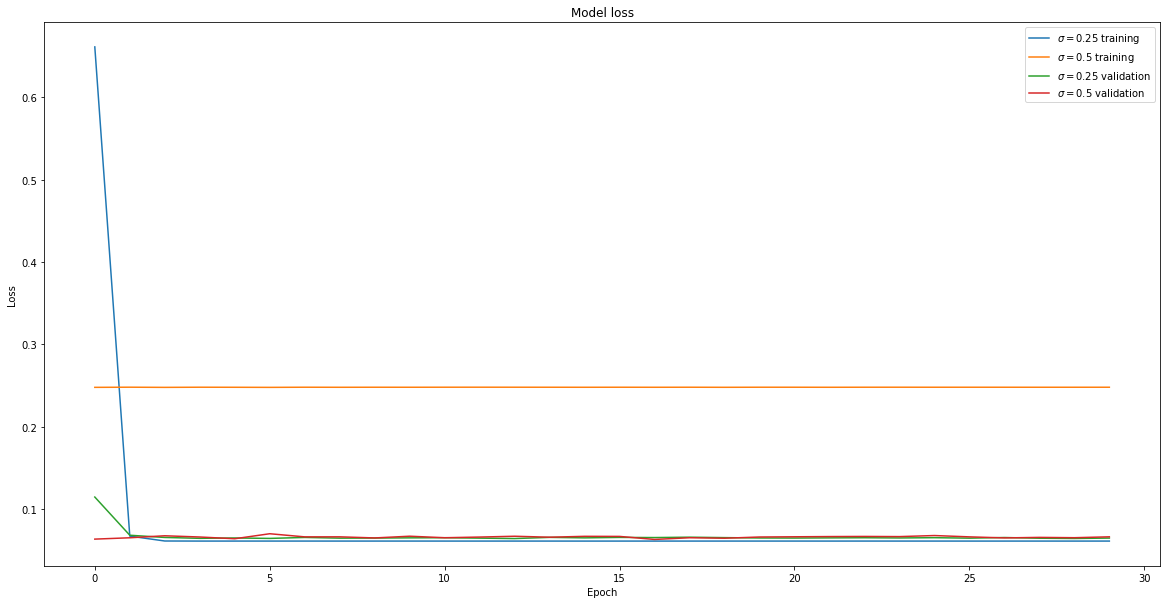

In [157]:
loss=np.asarray(loss)
val_loss=np.asarray(val_loss)
plt.figure(figsize=(20,10));
plt.plot(loss[0,:],label="$\sigma=0.25$ training")
plt.plot(loss[1,:],label="$\sigma=0.5$ training")


plt.plot(val_loss[0,:],label="$\sigma=0.25$ validation")
plt.plot(val_loss[1,:],label="$\sigma=0.5$ validation")



plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

Come mi aspettavo con la diminuzione della varianza si nota un miglioramento nella loss della validazione mentre c'è un peggioramento per la loss del training.